# Table of Contents

## 1) LDA
- determine number of topics

## 2) Visualization
- ### WordCloud
- ### PyLDAvis

In [1]:
import time, random, itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.externals import joblib

import pyLDAvis.sklearn

from wordcloud import WordCloud

In [2]:
df_vec = pd.read_csv("vectorized_data.csv", index_col=0)

In [3]:
word_list = df_vec.columns
ids = df_vec.index

## 1) LDA
- Number of Topics
- Likelihood, Perplexity

### Search for <code>n_topics</code>

In [4]:
df_vec = df_vec.values
n_topic_min = 5
n_topic_max = 30

scores = []
for i in range(n_topic_min, n_topic_max):
    print("n_topic = %s"%i)
    start = time.time()
    topics = i
    lda_model = LatentDirichletAllocation(n_components=topics,       # Number of topics
                                          max_iter=20,               # Max learning iterations
                                          learning_method='online',   
                                          random_state=100,          # Random state
                                          batch_size=128,            # n docs in each learning iter
                                          evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                          n_jobs = -1,               # Use all available CPUs
                                         )
    lda_output = lda_model.fit_transform(df_vec)
    print("fit model")

    end = time.time()
    print(round((end - start)/60), "minutes")
    start = time.time()
    
    scores.append([i, lda_model.score(df_vec), lda_model.perplexity(df_vec)])
    print("model score")
    
    end = time.time()
    print(round((end - start)/60), "minutes")
    start = time.time()

n_topic = 5
fit model
22 minutes
model score
2 minutes
n_topic = 6
fit model
22 minutes
model score
2 minutes
n_topic = 7
fit model
22 minutes
model score
2 minutes
n_topic = 8
fit model
21 minutes
model score
2 minutes
n_topic = 9
fit model
21 minutes
model score
2 minutes
n_topic = 10
fit model
21 minutes
model score
2 minutes
n_topic = 11
fit model
22 minutes
model score
2 minutes
n_topic = 12
fit model
21 minutes
model score
2 minutes
n_topic = 13
fit model
21 minutes
model score
2 minutes
n_topic = 14
fit model
21 minutes
model score
2 minutes
n_topic = 15
fit model
21 minutes
model score
2 minutes
n_topic = 16
fit model
21 minutes
model score
2 minutes
n_topic = 17
fit model
22 minutes
model score
2 minutes
n_topic = 18
fit model
22 minutes
model score
2 minutes
n_topic = 19
fit model
22 minutes
model score
2 minutes
n_topic = 20
fit model
22 minutes
model score
2 minutes
n_topic = 21
fit model
22 minutes
model score
2 minutes
n_topic = 22
fit model
23 minutes
model score
2 minut

In [5]:
# pd.DataFrame(scores).to_csv("scores.csv")

In [6]:
scores = pd.read_csv("scores.csv", index_col=0).values

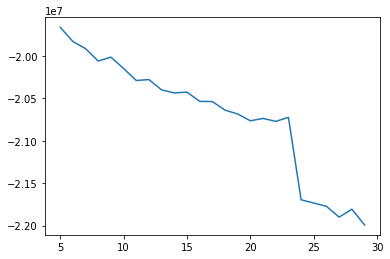

In [7]:
scores = np.array(scores)
plt.plot(scores[:, 0], scores[:, 1])

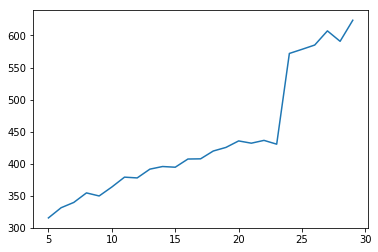

In [8]:
plt.plot(scores[:, 0], scores[:, 2])

### n_topic = 8~10

In [9]:
topics = 10
lda_model = LatentDirichletAllocation(n_components=topics,       # Number of topics
                                      max_iter=20,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

### Fit Model

In [10]:
start = time.time()
lda_output = lda_model.fit_transform(df_vec)
end = time.time()
print(round((end-start)/60), "minutes")

filename = 'lda_model.sav'
joblib.dump(lda_model, filename)

np.save("lda_output_topic%s.npy"%topics, lda_output)
np.save("lda_components_topic%s.npy"%topics, lda_model.components_)

21 minutes


In [11]:
lda_output = np.load("lda_output_topic%s.npy"%topics)
lda_components = np.load("lda_components_topic%s.npy"%topics)

In [12]:
# column names
topic_names = ["Topic" + str(i+1) for i in range(topics)]
# index names
tweet_keys = ids

df_document_topic = pd.DataFrame(data = np.round(lda_output, 2),
                                 columns = topic_names,
                                 index=tweet_keys)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['Dominant'] = dominant_topic+1

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Dominant
962039384739430400,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,8
962039446026698752,0.01,0.01,0.01,0.01,0.01,0.59,0.16,0.16,0.01,0.01,6
962039802462982144,0.18,0.02,0.02,0.18,0.02,0.02,0.02,0.52,0.02,0.02,8
962040477162790913,0.01,0.01,0.01,0.44,0.01,0.01,0.01,0.3,0.16,0.01,4
962040484519493633,0.02,0.22,0.02,0.02,0.02,0.02,0.22,0.02,0.22,0.22,2
962040532330536960,0.01,0.01,0.01,0.01,0.01,0.59,0.16,0.16,0.01,0.01,6
962040548314947585,0.23,0.01,0.57,0.01,0.01,0.01,0.12,0.01,0.01,0.01,3
962040578669125633,0.01,0.01,0.01,0.12,0.01,0.01,0.68,0.01,0.01,0.12,7
962040614115094528,0.02,0.42,0.02,0.02,0.02,0.02,0.02,0.22,0.22,0.02,2
962040641369722882,0.01,0.01,0.16,0.01,0.01,0.16,0.16,0.3,0.01,0.16,8


In [13]:
# show topic and tweets
pd.DataFrame(df_document_topic.iloc[:, -1].value_counts().reset_index().values, columns=["topic", "n_tweets"])

,topic,n_tweets
0,1,125761
1,3,112097
2,2,84004
3,6,80469
4,9,78260
5,10,77848
6,7,67846
7,5,67696
8,4,61323
9,8,40244


In [15]:
# 10 topics and their consisting words
df_topic_words = pd.DataFrame(lda_components, index = topic_names, columns = word_list)

In [16]:
df_keywords = pd.DataFrame(columns=np.arange(15))
for row in df_topic_words.index:
    df_keywords.loc[row] = df_topic_words.loc[row].sort_values(ascending=False).head(15).index.values
df_keywords

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic1,stem,amsterdam,zijlstra,stemmen,halbe,maart,voor,stemzeweg,grote,ananninga,gemeente,laat,krijgt,man,jan
Topic2,rotterdam,gaan,doen,jaar,heel,echt,debat,moeten,meer,staat,kunnen,kamer,kamerlid,zetels,tijd
Topic3,fvd,denk,weer,kan,sgp,wordt,worden,nederland,thierrybaudet,ben,heb,doet,mag,lijsttrekker,steeds
Topic4,nog,hebben,apechtold,mensen,thierrybaudet,waar,hier,even,lodewijka,jesseklaver,nieuws,volkskrant,jaren,vind,keer
Topic5,pechtold,referendum,christenunie,van,aan,partijen,ers,tponl,telegraaf,politieke,referendumdebat,nooit,zit,nou,penthouse
Topic6,pvv,wilders,geert,minister,was,goed,ollongren,alleen,weg,net,kaag,nos,geld,beste,video
Topic7,rutte,zijn,wel,moet,dus,mark,dan,zou,eens,komt,daar,kajsaollongren,grootste,minpres,weet
Topic8,heeft,partij,baudet,toch,eqexyokei,togetter,uit,mee,forum,zegt,islam,joostniemoller,maakt,zal,land
Topic9,pvda,ook,groenlinks,gaat,hoe,verkiezingen,waarom,willen,gewoon,nieuwe,zie,nida,motie,dan,campagne
Topic10,vvd,cda,vandaag,politiek,lijst,vindt,halbezijlstra,blijft,ddstandaard,beter,zorg,klaver,uitslag,jesse,oud


## 2) Visualization

### WordCloud

In [17]:
df_topic_words

,aan,aangifte,afgelopen,afschaffen,alexander,alleen,altijd,amp,amsterdam,amsterdamse,...,ziet,zijlstra,zijn,zit,zitten,zoetermeer,zojuist,zorg,zorgen,zou
Topic1,0.100010,0.100009,0.100009,0.100006,0.100006,0.100008,0.100008,4683.908746,24728.666577,0.100010,...,0.100009,22966.832921,0.100011,0.100008,0.100006,0.100006,0.100008,0.100013,0.100016,0.100008
Topic2,0.100016,0.100020,0.100010,0.100010,5420.167830,0.100013,0.100011,0.100010,0.100007,2503.294842,...,0.100016,0.100006,0.100010,0.100013,0.100011,0.100020,0.100017,0.100013,0.100011,0.100016
Topic3,0.100014,0.100010,0.100008,0.100010,0.100006,0.100013,0.100012,0.100006,0.100014,0.100011,...,0.100010,0.100006,0.100012,0.100012,0.100010,0.100003,1997.990255,0.100008,0.100012,0.100011
Topic4,0.100012,0.100023,0.100015,0.100007,0.100007,0.100013,0.100015,0.100007,0.100007,0.100008,...,0.100019,0.100010,0.100015,0.100016,0.100014,0.100002,0.100008,0.100011,0.100008,0.100018
Topic5,11058.324059,0.100021,0.100008,0.100030,0.100024,0.100011,0.100009,0.100005,0.100006,0.100008,...,0.100017,0.100009,0.100011,6610.004973,0.100008,2996.858448,0.100013,0.100006,0.100012,0.100009
Topic6,0.100011,0.100026,0.100005,0.100006,0.100008,12933.290821,4686.372741,0.100007,0.100004,0.100004,...,0.100053,0.100009,0.100010,0.100018,0.100011,0.100005,0.100009,0.100010,0.100004,0.100010
Topic7,0.100012,0.100016,0.100009,0.100021,0.100006,0.100013,0.100017,0.100006,0.100007,0.100003,...,0.100023,0.100017,41594.389488,0.100012,3405.611866,0.100001,0.100016,0.100011,0.100012,13616.798235
Topic8,0.100010,0.100006,3930.824725,0.100012,0.100011,0.100013,0.100012,0.100006,0.100008,0.100008,...,0.100013,0.100011,0.100011,0.100012,0.100008,0.100002,0.100013,0.100007,0.100019,0.100017
Topic9,0.100013,3946.428575,0.100009,3811.735965,0.100006,0.100014,0.100016,0.100009,0.100006,0.100010,...,4216.489168,0.100004,0.100012,0.100012,0.100017,0.100008,0.100010,0.100013,3573.805176,0.100010
Topic10,0.100013,0.100002,0.100009,0.100007,0.100003,0.100010,0.100011,0.100009,0.100008,0.100008,...,0.100012,0.100012,0.100012,0.100010,0.100009,0.100013,0.100011,5061.583185,0.100015,0.100007


In [26]:
df_wordcloud = (df_topic_words.apply(lambda x: x/x.sum(), axis=1)*50).astype(int)
df_wordcloud

,aan,aangifte,afgelopen,afschaffen,alexander,alleen,altijd,amp,amsterdam,amsterdamse,...,ziet,zijlstra,zijn,zit,zitten,zoetermeer,zojuist,zorg,zorgen,zou
Topic1,0,0,0,0,0,0,0,0,4,0,...,0,4,0,0,0,0,0,0,0,0
Topic2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topic3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topic4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topic5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Topic6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topic7,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,1
Topic8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topic9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topic10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def plot_wordcloud(df_wordcloud, nrows=3, ncols=3):
    fig, axes = plt.subplots(figsize = (5*ncols,5*nrows), ncols=ncols, nrows=nrows)
    if (nrows == 1) | (ncols == 1):
        locs=list(range(max(nrows,ncols)))
    else:
        locs=list(itertools.product(range(nrows), range(ncols)))

    for i, r in enumerate(df_wordcloud.index):
        row = df_wordcloud.loc[r]
        row = row.sort_values(ascending=False)
        row = np.repeat(row.index, row.values).tolist()
        random.shuffle(row)
        random.shuffle(row)
        random.shuffle(row)
        random.shuffle(row)
        random.shuffle(row)
        row = " ".join(row)
        all_text = row
        wordcloud = WordCloud(width=300, height=300,
                              relative_scaling=0.5,max_font_size=40,color_func=grey_color_func,
                             ).generate(all_text)
        loc = locs[i]
        ax = axes[loc]
        ax.imshow(wordcloud)
        ax.axis("off")
        ax.set_title("Topic %s"%i, size=25)    
    fig.tight_layout()

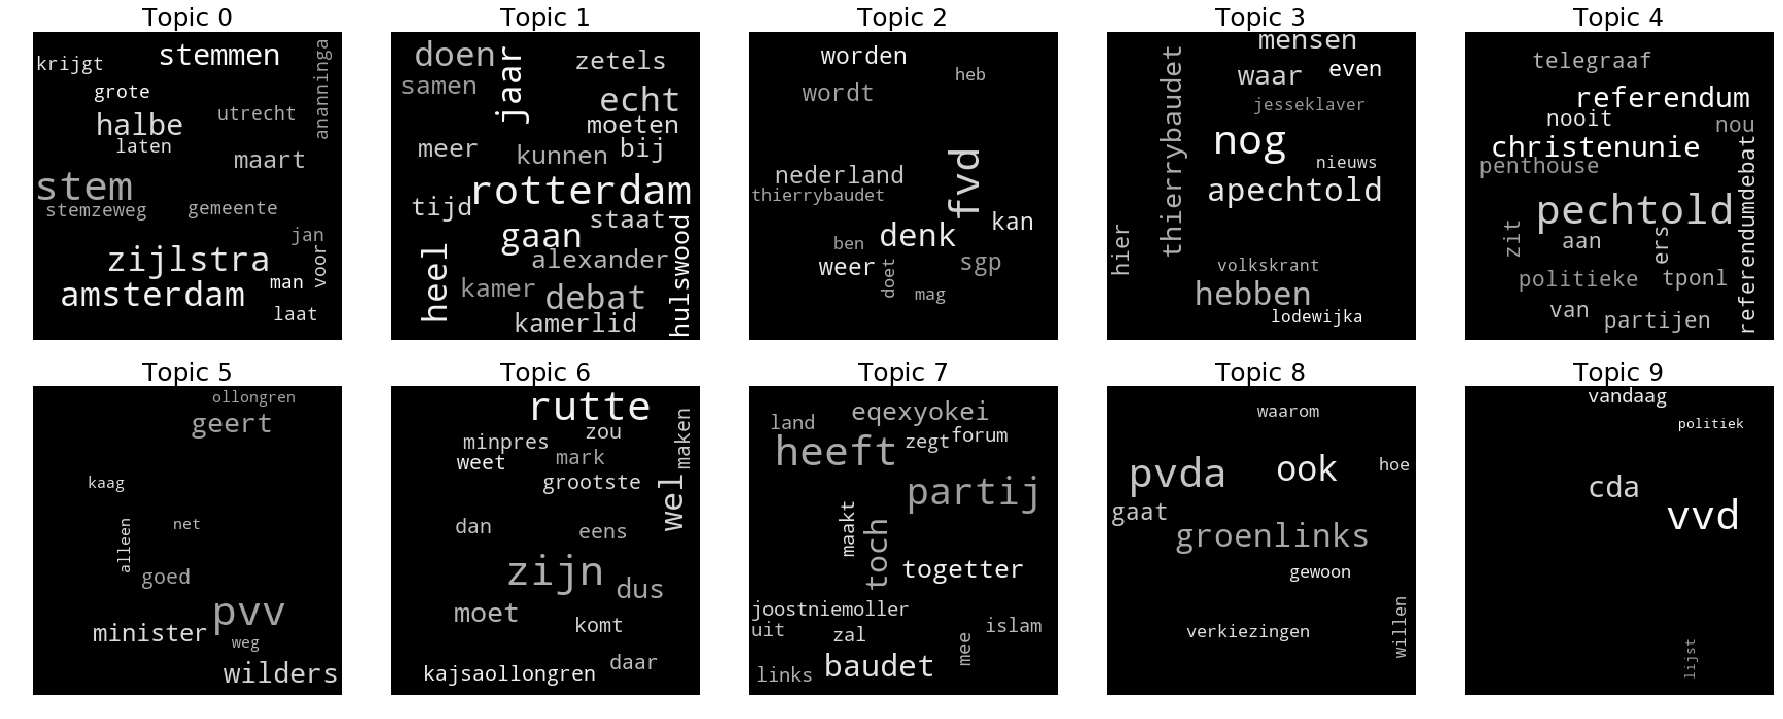

In [28]:
plot_wordcloud(df_wordcloud, ncols=5, nrows=2)

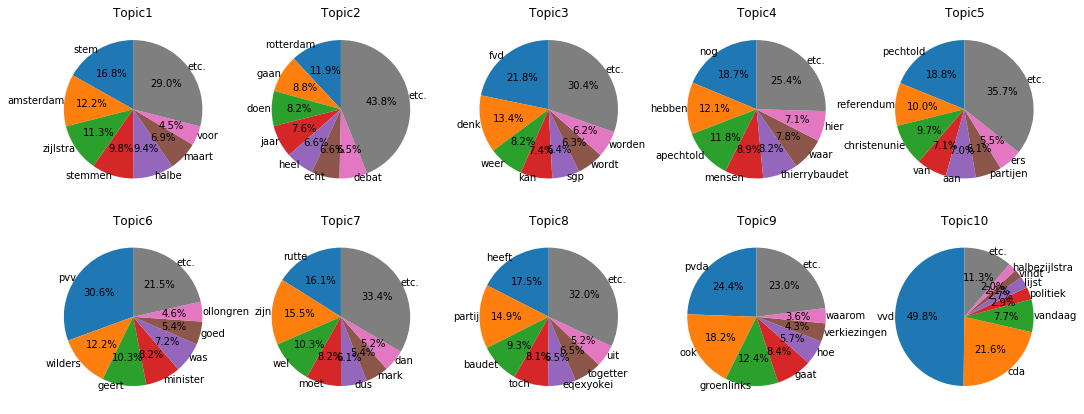

In [29]:
p = 50
plt.figure(figsize=(18,7))
for i,row in enumerate(df_topic_words.iterrows()):
    row = row[1]
    row = row.sort_values(ascending=False).head(15)
    show = row.values > np.percentile(row.values, p)
    non_show = row.values <= np.percentile(row.values, p)

    new_row_val = row.values[show].tolist()
    new_row_val.append(row.values[non_show].sum())

    new_row_index = row.index[show].tolist()
    new_row_index.append("etc.")
    
    plt.subplot(2,5,i+1)
    plt.pie(new_row_val, labels=new_row_index, startangle=90, labeldistance=1.0,
            autopct='%.1f%%')
    plt.title(row.name)

### PyLDAvis

In [30]:
filename = 'vectorizer.sav'
vectorizer = joblib.load(filename)

filename = 'data_vectorized.sav'
data_vectorized = joblib.load(filename)

filename = 'lda_model.sav'
lda_model = joblib.load(filename)

pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics          x          y
topic                                                  
8      12.769061        1       1 -75.193268  -5.626421
2      11.341557        1       2  50.698235   8.219387
9      11.105480        1       3 -22.547318  80.382942
6      10.849729        1       4   8.249181   8.616726
5      10.430226        1       5 -32.069557  -2.546073
4       9.668343        1       6 -21.540730  37.943203
0       8.691405        1       7 -65.648102  43.366852
1       8.580478        1       8  14.316356 -35.414333
7       8.424093        1       9  24.084654  54.468761
3       8.139629        1      10 -34.530266 -45.707340, topic_info=     Category           Freq           Term          Total  loglift  logprob
term                                                                        
355   Default  164096.000000            vvd  164096.000000  30.0000  30.0000
272   Default   87460.000000            pvv   87460.000000  29.0000  29.0000
38    Default   71159.000000            cda   71159.000000  28.0000  28.0000
270   Default   69969.000000           pvda   69969.000000  27.0000  27.0000
86    Default   58733.000000            fvd   58733.000000  26.0000  26.0000
243   Default   52226.000000            ook   52226.000000  25.0000  25.0000
234   Default   41762.000000            nog   41762.000000  24.0000  24.0000
288   Default   43389.000000          rutte   43389.000000  23.0000  23.0000
123   Default   38325.000000          heeft   38325.000000  22.0000  22.0000
398   Default   41852.000000           zijn   41852.000000  21.0000  21.0000
305   Default   36404.000000           stem   36404.000000  20.0000  20.0000
252   Default   32677.000000         partij   32677.000000  19.0000  19.0000
256   Default   33854.000000       pechtold   33854.000000  18.0000  18.0000
51    Default   36248.000000           denk   36248.000000  17.0000  17.0000
373   Default   34896.000000        wilders   34896.000000  16.0000  16.0000
109   Default   35554.000000     groenlinks   35554.000000  15.0000  15.0000
121   Default   27118.000000         hebben   27118.000000  14.0000  14.0000
92    Default   29430.000000          geert   29430.000000  13.0000  13.0000
14    Default   26275.000000      apechtold   26275.000000  12.0000  12.0000
8     Default   26309.000000      amsterdam   26309.000000  11.0000  11.0000
365   Default   27709.000000            wel   27709.000000  10.0000  10.0000
397   Default   24435.000000       zijlstra   24435.000000   9.0000   9.0000
336   Default   25315.000000        vandaag   25315.000000   8.0000   8.0000
317   Default   30291.000000  thierrybaudet   30291.000000   7.0000   7.0000
208   Default   23577.000000       minister   23577.000000   6.0000   6.0000
285   Default   21701.000000      rotterdam   21701.000000   5.0000   5.0000
307   Default   21276.000000        stemmen   21276.000000   4.0000   4.0000
17    Default   20465.000000         baudet   20465.000000   3.0000   3.0000
207   Default   19989.000000         mensen   19989.000000   2.0000   2.0000
116   Default   20376.000000          halbe   20376.000000   1.0000   1.0000
...       ...            ...            ...            ...      ...      ...
234   Topic10   41761.183070            nog   41762.106917   2.5084  -1.9016
121   Topic10   27117.987580         hebben   27118.911421   2.5084  -2.3334
14    Topic10   26274.910023      apechtold   26275.833837   2.5084  -2.3649
207   Topic10   19988.328893         mensen   19989.252732   2.5084  -2.6384
356   Topic10   17328.366444           waar   17329.290284   2.5084  -2.7812
127   Topic10   15848.174412           hier   15849.098254   2.5084  -2.8705
77    Topic10   11478.838053           even   11479.761899   2.5083  -3.1930
193   Topic10   10199.642813      lodewijka   10200.566640   2.5083  -3.3112
140   Topic10    6917.616580    jesseklaver    6918.540398   2.5083  -3.6995
230   Topic10    6218.829922         nieuws    6219